# 04 Statistics

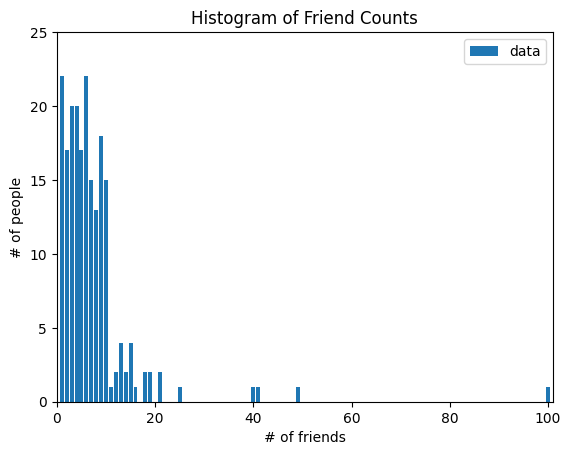

In [1]:
num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

from collections import Counter
import matplotlib.pyplot as plt

friend_counts = Counter(num_friends)
xs = range(101)                         # largest value is 100
ys = [friend_counts[x] for x in xs]     # height is just # of friends
plt.bar(xs, ys, label='data')
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.legend()
plt.show()


In [2]:
data_count = len(num_friends)         
print(data_count)

204


In [3]:
max_value = max(num_friends)
min_value = min(num_friends)

In [4]:
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]           
second_smallest_value = sorted_values[1]    
second_largest_value = sorted_values[-2]    

## Statistical functions

May required mathjax 

$$ \bar{x} = \dfrac{\sum{x_i}}{count} $$

In other words, 

$$ mean = \dfrac{sum(List)}{len(List)} $$

In [5]:
from typing import List

def mean(list: List[float]) -> float:
    return sum(list) / len(list)

mean_val = mean(num_friends)

print(mean_val)

7.333333333333333


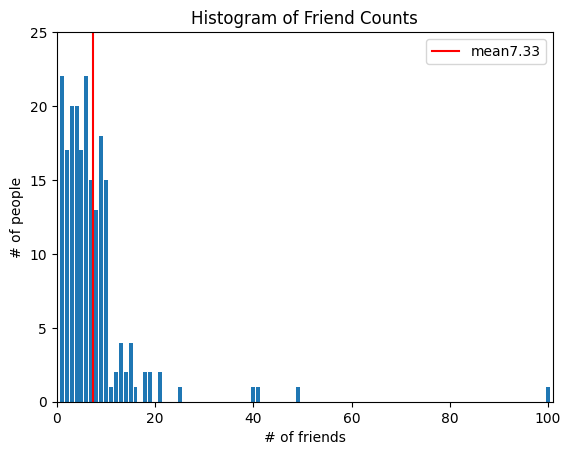

In [6]:
# adding a vertical line for mean value
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.axvline(mean_val, color='r', label='mean' + str(round(mean_val, 2)))

plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.legend()
plt.show()

$$ median(x) = \begin{cases} x_{\dfrac{n+1}{2}},& \text{if n odd} \\ \dfrac{1}{2} \Biggl( x_\dfrac{n}{2} + x_{\dfrac{n+1}{2}} \Biggr) , & \text{otherwise} \end{cases}  $$

In [7]:
def _median_odd(xs: List[float]) -> float:
    """If len(xs) is odd, the median is the middle element"""
    return sorted(xs)[len(xs) // 2]

def _median_even(xs: List[float]) -> float:
    """If len(xs) is even, it's the average of the middle two elements"""
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2  # e.g. length 4 => hi_midpoint 2
    return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2

def median(v: List[float]) -> float:
    """Finds the 'middle-most' value of v"""
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

In [8]:
median(num_friends)

6.0

In [9]:
def quantile(xs: List[float], p: float) -> float:
    """Returns the pth-percentile value in x"""
    p_index = int(p * len(xs))
    return sorted(xs)[p_index]

In [10]:
quantile(num_friends, 0.10)

1

In [11]:
quantile(num_friends, 0.25)

3

In [12]:
quantile(num_friends, 0.75)

9

In [13]:
quantile(num_friends, 0.90)

13

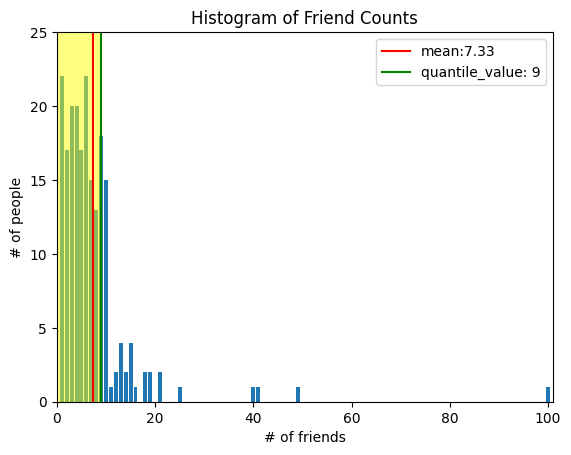

In [14]:
# adding a rectangle area for quantile values
# reference: https://www.pythonpool.com/matplotlib-draw-rectangle/

from matplotlib.patches import Rectangle

# Creating figure and axes in the plot
fig, ax = plt.subplots()

plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.axvline(mean_val, color='r', label='mean:' + str(round(mean_val, 2)))

quantile_value = quantile(num_friends, 0.75)
plt.axvline(quantile_value, color='green', label='quantile_value: ' + str(quantile_value))
ax.add_patch(Rectangle((0, 0), quantile_value, 25, color = 'yellow', alpha=0.5))



plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.legend()
plt.show()

### Dispersion and variance

Dispersion

$$ dispersion = max(List) - min(List) $$

Variance

$$ S^2 = \dfrac{\sum{(x_i - \bar{x})^2}}{n-1}  $$

In [15]:
def de_mean(list: List[float]) -> List[float]:
    x_bar = mean(list)
    return [x - x_bar for x in list]

In [16]:
# de_mean(num_friends)

In [17]:
from scratch import linear_algebra as la

def variance(list: List[float]) -> float:
    """Almost the average squared deviation from the mean"""
    assert len(list) >= 2, "variance requires at least two elements"

    n = len(list)
    deviations = de_mean(list)
    return la.sum_of_squares(deviations) / (n - 1)

In [18]:
variance(num_friends)

81.54351395730716

In [19]:
import math

def standard_deviation(list: List[float]) -> float:
    """The standard deviation is the square root of the variance"""
    return math.sqrt(variance(list))

In [20]:
standard_deviation(num_friends)

9.03014473623248

The variance and standard deviation suffer from outliers problem. A solution to it can be interquartile range.

In [21]:
def interquartile_range(xs: List[float]) -> float:
    """Returns the difference between the 75%-ile and the 25%-ile"""
    return quantile(xs, 0.75) - quantile(xs, 0.25)

In [22]:
interquartile_range(num_friends)

6

### Correlation

Correlation helps in measuring degree of relationship between two variables.

For example, we may propose that the number of friends a person has is related to the amount of time they spend online on social network site.

In [23]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

In [24]:
import pandas as pd

data = {'NumFriends' : num_friends, 'DailyMinutes' : daily_minutes}
df = pd.DataFrame(data)

corr = df['NumFriends'].corr(df['DailyMinutes'])
corr

0.2473695736647822

| sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm) | target |
| ----------------- | ---------------- | ----------------- | ---------------- | ------ |
| 5.1 |	3.5 | 1.4 | 0.2 | 0 |
| 4.9 |	3.0 | 1.4 | 0.2 | 0 |
| 4.7 |	3.2 | 1.3 | 0.2 | 0 |
| 4.6 |	3.1 | 1.5 | 0.2 | 0 |
| 5.0 |	3.6 | 1.4 | 0.2 | 0 |

In [25]:
sepal_length = [5.1, 4.9, 4.7, 4.6, 5.0]
sepal_width = [3.5, 3.0, 3.2, 3.1, 3.6]
petal_length = [1.4, 1.4, 1.3, 1.5, 1.4]
petal_width = [0.2, 0.2, 0.2, 0.2, 0.2]
target = [0, 0, 0, 0, 0]

iris_data = {'SepalL' : sepal_length, 'SepalW' : sepal_width, 'PetalL' : petal_length, 'PetalW' : petal_width, 'Target' : target}
df = pd.DataFrame(iris_data)

corr = df['SepalL'].corr(df['PetalL'])
corr

-0.1704985848676201

In [26]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\PPj\AppData\Roaming\Python\Python311\site-packages\pandas\io\formats\style.py:3925: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\PPj\AppData\Roaming\Python\Python311\site-packages\pandas\io\formats\style.py:3926: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,SepalL,SepalW,PetalL,PetalW,Target
SepalL,1.000000,0.680019,-0.170499,nan,nan
SepalW,0.680019,1.000000,-0.136590,nan,nan
PetalL,-0.170499,-0.136590,1.000000,nan,nan
PetalW,nan,nan,nan,nan,nan
Target,nan,nan,nan,nan,nan


#### Using Pandas library for statistical and probabilistic analysis

Reference: https://www.kaggle.com/code/swamita/exploratory-data-analysis-on-fifa-20-dataset

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objs as go
import plotly.express as px

In [28]:
data = pd.read_csv("./fifa_22_players.csv", low_memory=False)

In [29]:
data.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [30]:
data.shape

(19239, 110)

In [31]:
# list(data.columns)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB


In [33]:
data.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,...,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,...,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,...,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,...,50.000000,29.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,27.000000
50%,236543.000000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1938.000000,1.000000,...,59.000000,52.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,36.000000
75%,253532.500000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,111139.000000,1.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000
max,264640.000000,93.000000,95.000000,1.940000e+08,350000.000000,54.000000,206.000000,110.000000,115820.000000,5.000000,...,96.000000,93.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000


In [34]:
remove_columns = ['sofifa_id','player_url','long_name','dob','nation_jersey_number']
data = data.drop(remove_columns, axis = 1)

In [35]:
numeric_columns = ['age', 'height_cm', 'weight_kg', 'wage_eur', 'pace']

numeric_dataset = data[numeric_columns]

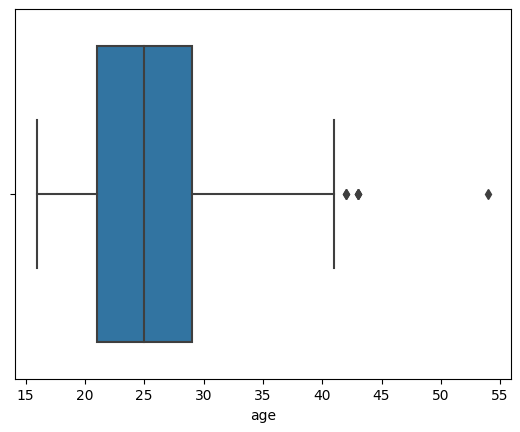

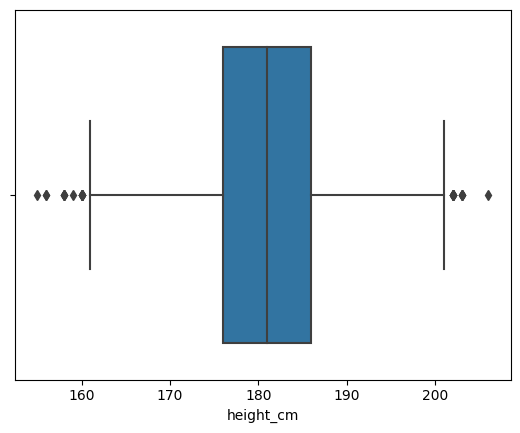

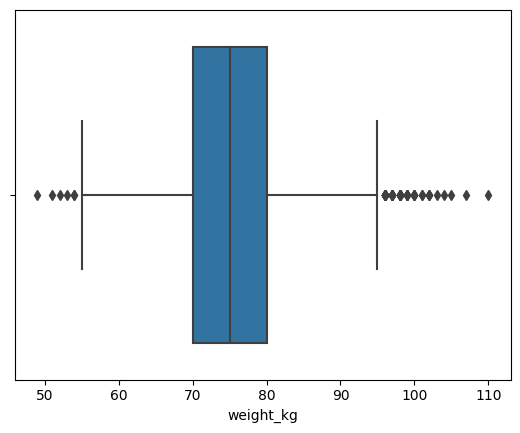

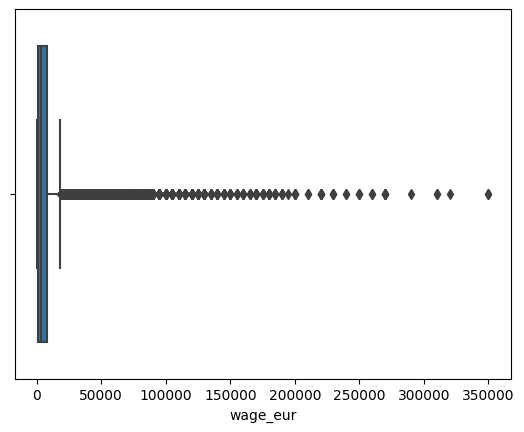

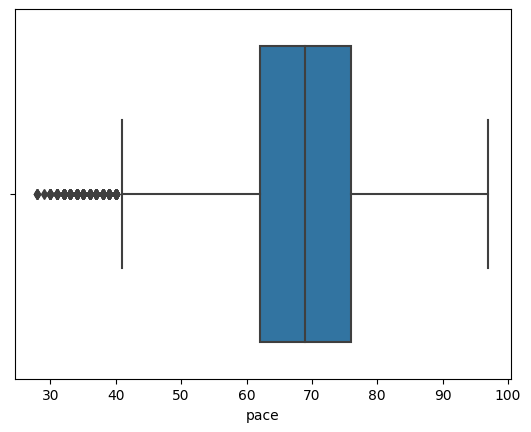

In [36]:
for col in numeric_dataset.columns:
    sns.boxplot(x = col, data = numeric_dataset)
    plt.show()

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'height_cm'}>],
       [<AxesSubplot: title={'center': 'weight_kg'}>,
        <AxesSubplot: title={'center': 'wage_eur'}>],
       [<AxesSubplot: title={'center': 'pace'}>, <AxesSubplot: >]],
      dtype=object)

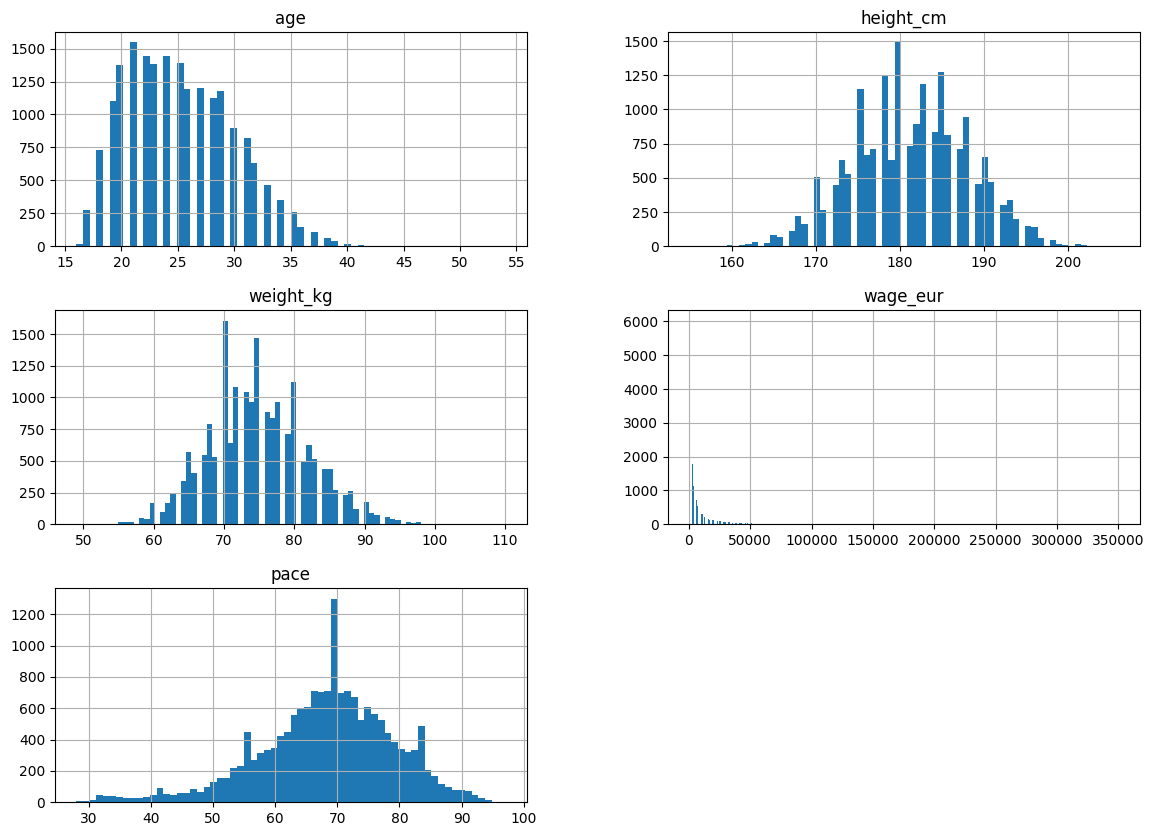

In [37]:
numeric_dataset.hist(bins='auto', figsize=(14, 10))

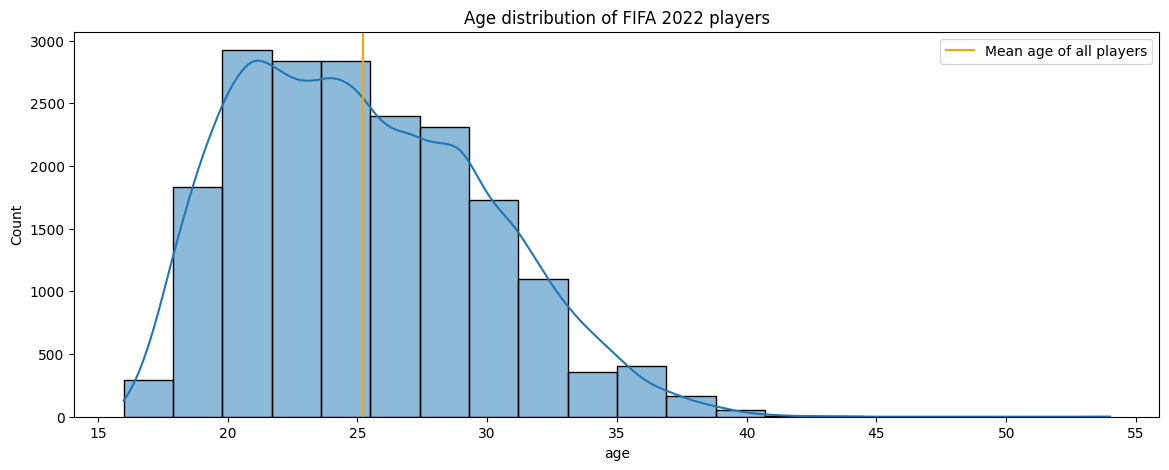

In [38]:
# analyzing age

plt.figure(figsize=(14,5))
plt.title('Age distribution of FIFA 2022 players')
sns.histplot(numeric_dataset['age'], kde = True, bins = 20)
plt.axvline(x=np.mean(numeric_dataset['age']), c='orange', label='Mean age of all players')
plt.legend()

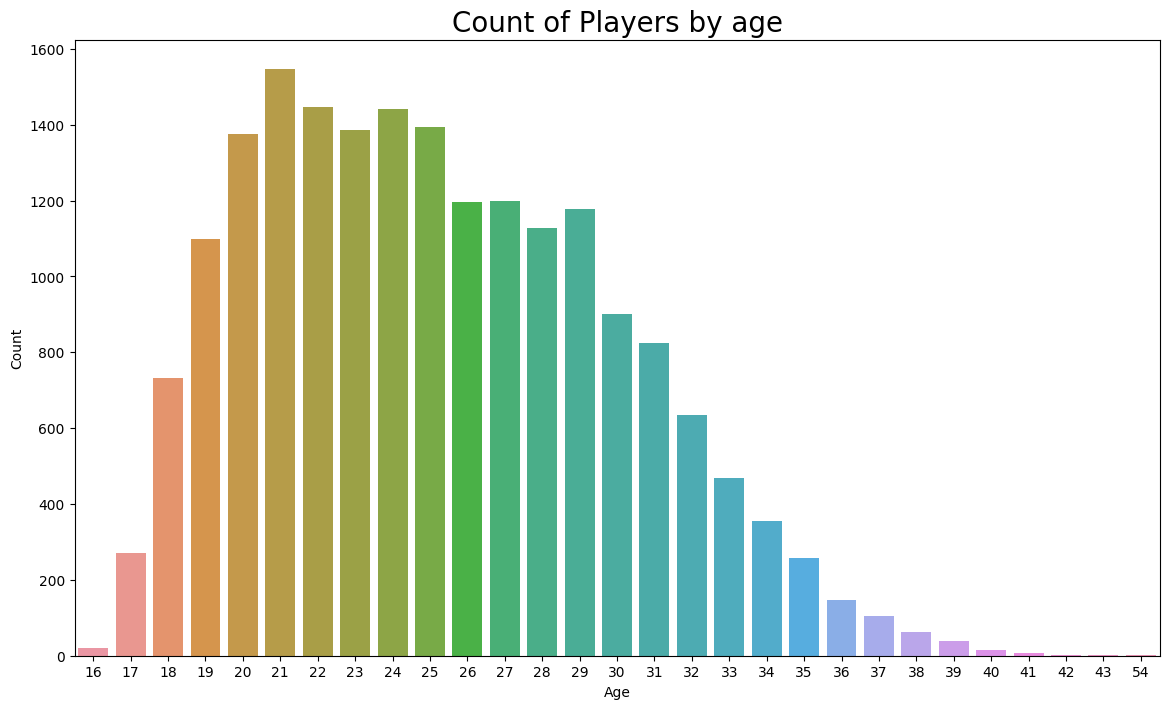

In [39]:
plt.figure(figsize= (14,8))

ax = sns.countplot(x='age', data=numeric_dataset)
ax.set_title(label='Count of Players by age', fontsize=20)

ax.set_xlabel(xlabel='Age')
ax.set_ylabel(ylabel='Count')

plt.show()

In [40]:
# Oldest player/s
data.loc[numeric_dataset['age'] == data['age'].max()]

,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
16209,K. Miura,ST,59,59,NaN,700.0,54,177,72,113197.0,...,32+2,32+2,32+2,31+2,12+2,https://cdn.sofifa.net/players/254/704/22_120.png,https://cdn.sofifa.net/teams/113197/60.png,https://cdn.sofifa.net/flags/jp.png,NaN,https://cdn.sofifa.net/flags/jp.png


In [41]:
# youngest player/s
# data.loc[numeric_dataset['age'] == data['age'].min()]

In [42]:
# Write code for tallest
# Write code for heaviest

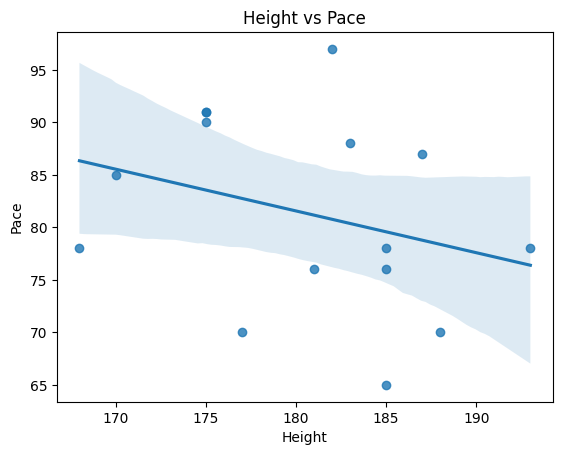

In [43]:
# Let's see relationship between height and pace with regression model
plt.figure()
x=data.head(20)['height_cm']
y=data.head(20)['pace']

sns.regplot(x = x, y = y)
plt.title('Height vs Pace')
plt.xlabel('Height')
plt.ylabel('Pace')
plt.show()


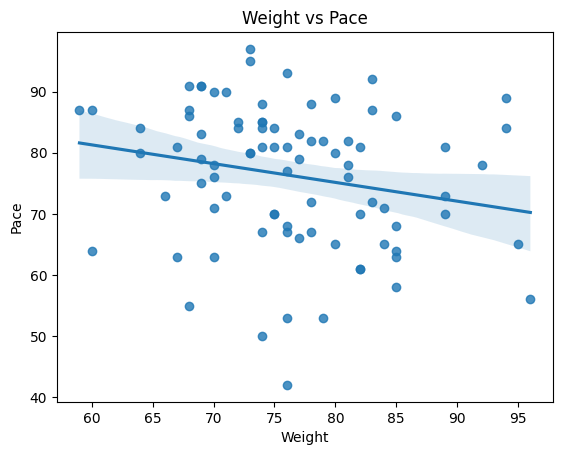

In [44]:
plt.figure()
x=data.head(100)['weight_kg']
y=data.head(100)['pace']

sns.regplot(x = x, y = y)
plt.title('Weight vs Pace')
plt.xlabel('Weight')
plt.ylabel('Pace')
plt.show()

#### Probabilistic calculations with distributions

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# generate random number between 0 and 1
np.random.randint(0,7)

3

In [18]:
# generate random number between 0 and 1, for 10000 times
np.random.randint(2, size=10000)

array([0, 0, 0, ..., 0, 1, 1])

In [19]:
# a lambda function to generate random numbers 0 & 1 for 10000 times
rand_num = lambda : np.random.randint(2, size=10000)

In [20]:
rand_num().mean()

0.4903

In [22]:
rand_num().mean()

0.501

In [23]:
# Generating random numbers that follow distributions

# e.g. binomial distribution - a discrete probability distribution 
# parameters: p - no. of successes in a sequence of n independent experiments
# success value depends on 'yes' or 'no' / true or false

# e.g. let's flip 10 coins 20 times i.e. a total of 10x20 = 200 times. Each flip has 10 coins and each coin flip has a probaility of 0.5 of getting head 
np.random.binomial(10, 0.5, 20)

array([4, 4, 4, 4, 5, 6, 4, 4, 7, 5, 4, 3, 5, 4, 6, 7, 5, 6, 6, 5])

In [24]:
np.random.binomial(10, 0.5, 20).mean()

4.7

(array([ 10.,  47., 105., 216., 241., 205., 125.,  42.,   8.,   1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

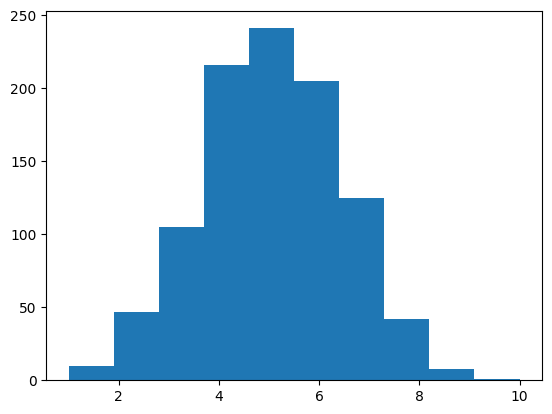

In [29]:
plt.hist(np.random.binomial(10, 0.5, 1000))

#### Bayes rules computation

Uses conditional probabilities to calculate posterior probabilities of events given the prior-probabilities.

$$ P(A|B) = \frac{P(B|A).P(A)}{P(B)} $$

where, <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $ P(A|B) $ = posterior probability of A given that the B is true <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $ P(B|A) $ = prior probability of B given that the A is true <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $ P(A) $ = probability of A <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $ P(B) $ = probability of B <br>

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# bucket A has 30 blue balls & 10 yellow balls and 
# bucket B has 20 blue balls and 20 yellow balls

# Any bucket can be chose with probabilty of 1/2 each

# If a blue bucket was chosen, then what is the 
# probability that the ball was taken from bucket A?

hypotheses = 'bucket a', 'bucket b'
probabilities= 1/2,1/2

In [55]:
# now, let's generate prior probilities 

prior = pd.Series(probabilities, hypotheses)
print(prior)

bucket a    0.5
bucket b    0.5
dtype: float64


In [56]:
# if the chances of choosing a blue ball from bucket A is 3/4 and 
# from bucket B is 1/2 then

likelihood = 3/4, 1/2

In [57]:
# unnormalized posterior probaility that blue was chosen from
unnorm = prior * likelihood
print(unnorm)

bucket a    0.375
bucket b    0.250
dtype: float64


In [58]:
prob_data = unnorm.sum()
prob_data

0.625

In [59]:
posterior_prob = unnorm / prob_data
posterior_prob
# shows the probability of choosing blue ball from the buckets

bucket a    0.6
bucket b    0.4
dtype: float64

### Hypothesis testing

Steps in hypothesis testing

1. Model data
2. Compute model parameters
3. Cmpute a test statistics

e.g. If a coin is flipped 3 times, then the possibilities and count of getting head will be as follows

| 1 | 2 | 3 | Count of heads |
|---|---|---|---|
| | | | 0 |
| H | | | 1 |
| | H | | 1 |
| | | H | 1 |
| H | H | | 2 |
| H | | H | 2 |
| | H | H | 2 |
| H | H | H | 3 |

So, now the model will have probabilities as follows;

$$ P(count=0) = 1/8 $$
$$ P(count=1) = 3/8 $$
$$ P(count=2) = 3/8 $$
$$ P(count=3) = 1/8 $$


Text(0.5, 0, 'Distribution of no. of heads over 3 flips of a coin')

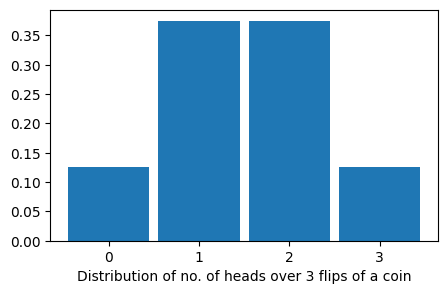

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))

plt.bar([0, 1, 2, 3], [1/8, 3/8, 3/8, 1/8], width=0.9)

plt.xticks([0, 1, 2, 3], [0, 1, 2, 3])

plt.xlabel("Distribution of no. of heads over 3 flips of a coin")


For a fair coin, probability of getting two or more heads is;

$P(x >= 2 | H_0) = P(x=2) + P(x=3)$ <br>
$ = 3/8 + 1/8 = 1/2 $

If the coin is flipped for 100 times, then the heads are found in 60 flips, is the coin biased?

Let's create a null hypothese $H_0$: The coin is not biased for $N = 100$ and $P =60/100$.

For a fair coin, we consider the coin flips follow the binomial distribution with $N=100$ and $P=0.5$.

In [12]:
import numpy as np
import scipy

success = np.linspace(30, 70, 41)

print(success)

[30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47.
 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65.
 66. 67. 68. 69. 70.]


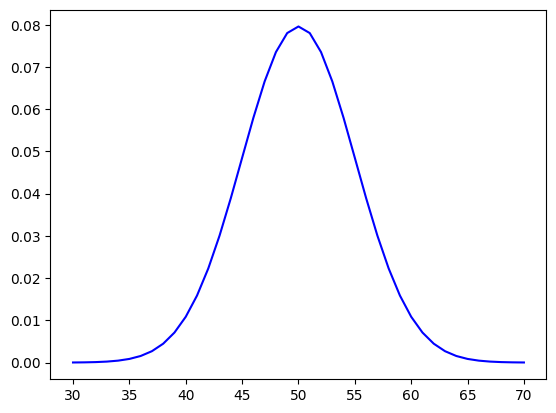

In [18]:
# let's plot the numbers 

plt.plot(success, scipy.stats.binom.pmf(success, 100, 0.5), 'b-', label="Binomial(100,0.5)")


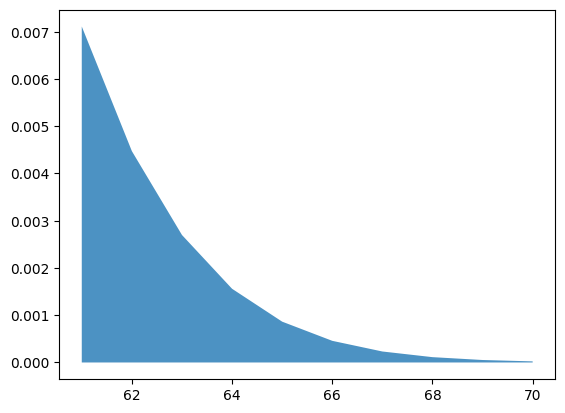

In [19]:
upper_success_tvalues = success[success > 60]
plt.fill_between(upper_success_tvalues, 0, scipy.stats.binom.pmf(upper_success_tvalues, 100, 0.5), alpha=.8, label="p-value")


In [37]:
pval = 1 - scipy.stats.binom.cdf(60, 100, 0.5)
print(pval)

0.01760010010885238


[30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47.
 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65.
 66. 67. 68. 69. 70.]
p-val 0.01760010010885238


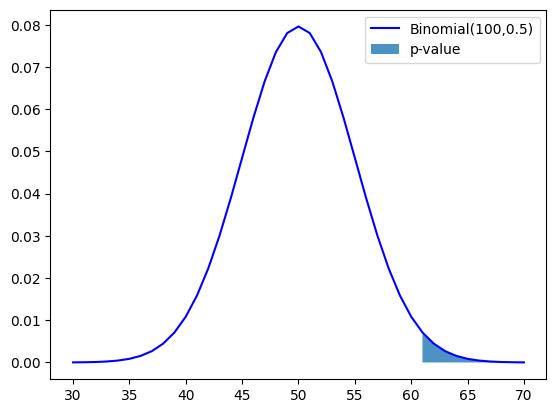

In [28]:
import numpy as np
import scipy

success = np.linspace(30, 70, 41)

print(success)

# let's plot the numbers 

plt.plot(success, scipy.stats.binom.pmf(success, 100, 0.5), 'b-', label="Binomial(100,0.5)")

upper_success_tvalues = success[success > 60]
plt.fill_between(upper_success_tvalues, 0, scipy.stats.binom.pmf(upper_success_tvalues, 100, 0.5), alpha=.8, label="p-value")

plt.legend()

pval = 1 - scipy.stats.binom.cdf(60, 100, 0.5)
print("p-val", pval)



Let's try another example for testing the data using one sample $t$-test method.

We will conduct simple hypothesis test for mean to see whether the mean of observed data truly represents the mean or not.

Normally, you can simply calculate the mean of the data in one easy step. However, if the data is taken randomly and data really varies (indicated by standard deviation), the mean that we calculate may not be actual mean of the population. Therefore, we need to test the mean as well!

Steps:
1. We are collecting height of students from a class. The data is considered to be normally distributed
2. Then we calculate sample mean
3. We propose that expected mean is $\mu_0$, this expected mean is then tested using $t$-test 

Considerations:
* The heights of students are normally distributed: $X~N(\mu, \sigma)$
* Height of a student $X_i = \bar{x} + \epsilon_i$, where $\epsilon$ is error/residuals
* Estimations of $\mu, \sigma$ are $\bar{x}, s_x$ 
* $t$-value is computed as; $t=\frac{\bar{x}-\mu}{s /\sqrt{n}}$




In [29]:
height = [1.83, 1.83, 1.73, 1.82, 1.83, 1.73, 1.99, 1.85, 1.68, 1.87]

xbar = np.mean(height)

mu = 1.75  # hypothesized value

standard_dev = np.std(height, ddof=1)   # set ddof = 1 for un-based estimator

n = len(height)

print("mean: ", xbar)

t_observed = (xbar - mu) / (standard_dev / np.sqrt(n))

print("t observed: ", t_observed)

mean:  1.816
t observed:  2.3968766311585883


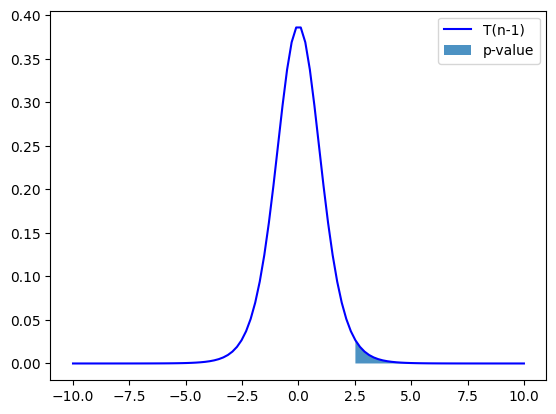

In [27]:
tvalues = np.linspace(-10, 10, 100)

plt.plot(tvalues, scipy.stats.t.pdf(tvalues, n-1), 'b-', label="T(n-1)")

upper_tval_tvalues = tvalues[tvalues > t_observed]

plt.fill_between(upper_tval_tvalues, 0, scipy.stats.t.pdf(upper_tval_tvalues, n-1), alpha=0.8, label="p-value")

plt.legend()

The hypothesis for testing is;
$H_0: P( t > t_observed|H_0)$

In [32]:
# https://rowannicholls.github.io/python/statistics/hypothesis_testing/one_sample_t_test.html#one-sample-t-tests

from scipy import stats

statistics, pvalue = stats.ttest_1samp(height, mu)

print("pvalue: ", pvalue)

pvalue:  2.765109495904557e-06


Since, the pvalue is less than 0.05, i.e. 5% level of significance, the height distribution is acceptable.

In [35]:
statistics, pvalue = stats.ttest_1samp(height, 1.6)

print("pvalue: ", pvalue)

pvalue:  2.5888735034217936e-05
